In [26]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from keras import backend as K
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras import regularizers

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#Lectura de datos e informacion relevante de estos
datos= pd.read_csv("roboBohr.csv")
datos.shape
datos.info()
datos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Unnamed: 0 to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
count,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,...,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,8139.041805,115.715266,22.445723,20.474191,18.529573,17.169350,15.816888,15.133152,14.471534,13.960759,...,0.000134,0.000133,0.003879,0.000131,0.000129,0.002155,0.000127,0.001201,33107.484300,-11.178969
std,4698.182820,113.198503,8.659586,7.670481,6.485777,5.512560,4.179691,3.885091,3.503075,3.357136,...,0.002728,0.002705,0.043869,0.002676,0.002633,0.032755,0.002594,0.024472,23456.785147,3.659133
min,0.000000,36.858105,2.906146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-23.245373
25%,4068.250000,73.516695,17.969345,16.228071,15.165862,13.744092,13.653146,13.637784,12.759519,12.587359,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12298.250000,-13.475805
50%,8142.500000,73.516695,20.662511,18.631287,17.690729,16.020040,15.156646,13.848274,13.659233,13.652832,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27731.500000,-10.835211
75%,12207.750000,73.516695,21.132432,20.739496,18.712895,18.297501,17.639688,16.154918,15.499474,14.900585,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55020.750000,-8.623903
max,16272.000000,388.023441,73.563510,66.269180,66.268891,66.268756,66.268196,66.264158,66.258487,66.258177,...,0.062225,0.061999,0.500000,0.061534,0.059760,0.500000,0.057834,0.500000,74980.000000,-0.789513


In [28]:
datos.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
#Estas columnas se eliminan debido a que no son originarias de las muestras, son valores utilizados para mantener un orden y numeracion de los datos.
#No contienen relación alguna con los valores.
total=len(datos)
df_train=datos[:int(0.6*total)]                       #60% de los datos
df_val=datos[int(0.6*total):int(0.85*total)]          #25% de los datos
df_test=datos[int(0.85*total)::]                      #15% restante

In [29]:
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
X_val_scaled =  pd.DataFrame(scaler.transform(df_val),columns=df_val.columns)
X_test_scaled =  pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)

y_train_scaled = df_train.pop('Eat').values.reshape(-1,1)
y_val_scaled = df_val.pop('Eat').values.reshape(-1,1)
y_test_scaled = df_test.pop('Eat').values.reshape(-1,1)

X_train_scaled.drop(columns=['Eat'],axis=1,inplace=True)
X_val_scaled.drop(columns=['Eat'],axis=1,inplace=True)
X_test_scaled.drop(columns=['Eat'],axis=1,inplace=True)

In [30]:
#b)
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')

In [31]:
#se obtienen los gradientes sin entrenar el modelo
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

Text(0.5,1,'Capa 2')

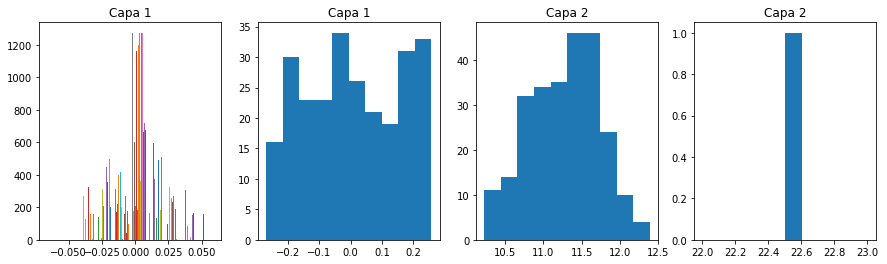

In [41]:
#histograma de gradientes
plt.figure(figsize=(15,4))
plt.subplot(141)
plt.hist(evaluated_gradients[0])
plt.title("Capa 1")
plt.subplot(142)
plt.hist(evaluated_gradients[1])
plt.title("Capa 1")
plt.subplot(143)
plt.hist(evaluated_gradients[2])
plt.title("Capa 2")
plt.subplot(144)
plt.hist(evaluated_gradients[3])
plt.title("Capa 2")

In [42]:
#se entrena el modelo
history = model.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 300us/step - loss: 1.3323 - val_loss: 0.5546
Epoch 2/250
9745/9745 [==============================] - 2s 241us/step - loss: 0.6046 - val_loss: 0.6562
Epoch 3/250
9745/9745 [==============================] - 2s 224us/step - loss: 0.4811 - val_loss: 0.3683
Epoch 4/250
9745/9745 [==============================] - 2s 226us/step - loss: 0.4028 - val_loss: 0.3059
Epoch 5/250
9745/9745 [==============================] - 2s 249us/step - loss: 0.3470 - val_loss: 0.2808
Epoch 6/250
9745/9745 [==============================] - 2s 233us/step - loss: 0.3009 - val_loss: 0.2404
Epoch 7/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.2620 - val_loss: 0.2524
Epoch 8/250
9745/9745 [==============================] - 3s 312us/step - loss: 0.2389 - val_loss: 0.2265
Epoch 9/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.2136 - val_loss: 0.2286
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 244us/step - loss: 0.0303 - val_loss: 0.0441
Epoch 79/250
9745/9745 [==============================] - 2s 234us/step - loss: 0.0290 - val_loss: 0.0471
Epoch 80/250
9745/9745 [==============================] - 2s 230us/step - loss: 0.0290 - val_loss: 0.0435
Epoch 81/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.0289 - val_loss: 0.0471
Epoch 82/250
9745/9745 [==============================] - 2s 251us/step - loss: 0.0286 - val_loss: 0.0445
Epoch 83/250
9745/9745 [==============================] - 2s 253us/step - loss: 0.0279 - val_loss: 0.0452
Epoch 84/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.0283 - val_loss: 0.0441
Epoch 85/250
9745/9745 [==============================] - 2s 225us/step - loss: 0.0281 - val_loss: 0.0485
Epoch 86/250
9745/9745 [==============================] - 2s 223us/step - loss: 0.0282 - val_loss: 0.0468
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 226us/step - loss: 0.0194 - val_loss: 0.0394
Epoch 156/250
9745/9745 [==============================] - 2s 222us/step - loss: 0.0193 - val_loss: 0.0376
Epoch 157/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.0194 - val_loss: 0.0415
Epoch 158/250
9745/9745 [==============================] - 2s 249us/step - loss: 0.0192 - val_loss: 0.0409
Epoch 159/250
9745/9745 [==============================] - 2s 236us/step - loss: 0.0187 - val_loss: 0.0428
Epoch 160/250
9745/9745 [==============================] - 2s 216us/step - loss: 0.0201 - val_loss: 0.0437
Epoch 161/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.0186 - val_loss: 0.0361
Epoch 162/250
9745/9745 [==============================] - 2s 220us/step - loss: 0.0193 - val_loss: 0.0411
Epoch 163/250
9745/9745 [==============================] - 2s 226us/step - loss: 0.0187 - val_loss: 0.0452
Epoch 164/250
9745/9745 [============

In [43]:
score = model.evaluate(X_test_scaled, y_test_scaled)
print("\n Loss: %.3f \t:" %(score))

2437/2437 [==============================] - 0s 83us/step

 Loss: 0.028 	:


In [44]:
#se obtienen los gradietes luego de entrenar
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

Text(0.5,1,'Capa 2')

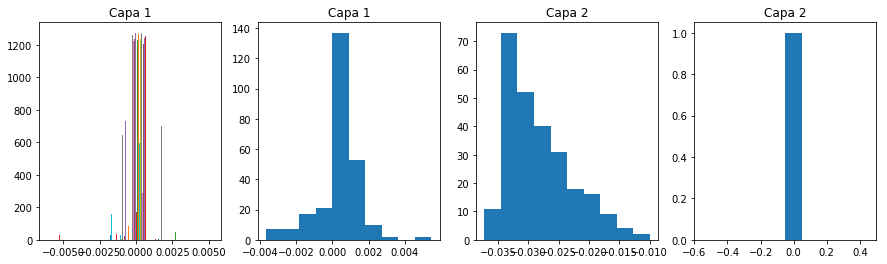

In [45]:
#histograma luego de entrenado
plt.figure(figsize=(15,4))
plt.subplot(141)
plt.hist(evaluated_gradients[0])
plt.title("Capa 1")
plt.subplot(142)
plt.hist(evaluated_gradients[1])
plt.title("Capa 1")
plt.subplot(143)
plt.hist(evaluated_gradients[2])
plt.title("Capa 2")
plt.subplot(144)
plt.hist(evaluated_gradients[3])
plt.title("Capa 2")

In [60]:
#c)
modelC = Sequential()
modelC.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
modelC.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelC.add(Dense(256,  kernel_initializer='uniform',activation='sigmoid'))
modelC.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelC.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelC.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelC.compile(optimizer=sgd,loss='mean_squared_error')

In [61]:
#obtener gradientes sin entrenar red
loss = keras.losses.mean_squared_error(modelC.output,y_train_scaled)
listOfVariableTensors = modelC.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={modelC.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

Text(0.5,1,'Capa 4')

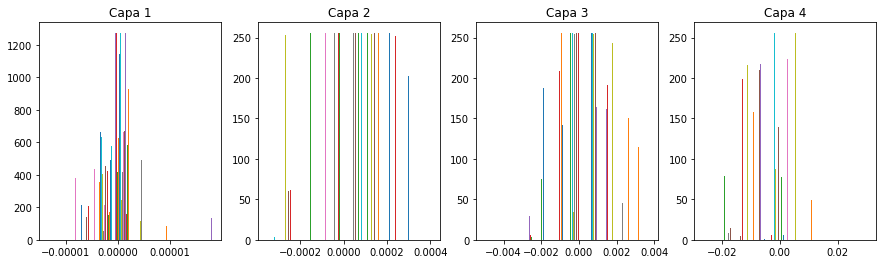

In [62]:
#Histograma
plt.figure(figsize=(15,4))
plt.subplot(141)
plt.hist(evaluated_gradients[0])
plt.title("Capa 1")
plt.subplot(142)
plt.hist(evaluated_gradients[2])
plt.title("Capa 2")
plt.subplot(143)
plt.hist(evaluated_gradients[4])
plt.title("Capa 3")
plt.subplot(144)
plt.hist(evaluated_gradients[6])
plt.title("Capa 4")

In [63]:
#Se entrena el modelo
history = modelC.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 406us/step - loss: 14.6389 - val_loss: 13.7932
Epoch 2/250
9745/9745 [==============================] - 4s 393us/step - loss: 14.0441 - val_loss: 16.3782
Epoch 3/250
9745/9745 [==============================] - 3s 336us/step - loss: 14.0012 - val_loss: 15.0458
Epoch 4/250
9745/9745 [==============================] - 4s 427us/step - loss: 13.9754 - val_loss: 13.9849
Epoch 5/250
9745/9745 [==============================] - 4s 380us/step - loss: 11.3529 - val_loss: 2.7745
Epoch 6/250
9745/9745 [==============================] - 4s 377us/step - loss: 1.8270 - val_loss: 0.8914
Epoch 7/250
9745/9745 [==============================] - 4s 362us/step - loss: 0.8552 - val_loss: 0.7422
Epoch 8/250
9745/9745 [==============================] - 3s 341us/step - loss: 0.6907 - val_loss: 0.6171
Epoch 9/250
9745/9745 [==============================] - 3s 342us/step - loss: 0.6766 - val_loss: 0.850

Epoch 78/250
9745/9745 [==============================] - 3s 346us/step - loss: 0.0577 - val_loss: 0.0707
Epoch 79/250
9745/9745 [==============================] - 3s 324us/step - loss: 0.0492 - val_loss: 0.0522
Epoch 80/250
9745/9745 [==============================] - 3s 325us/step - loss: 0.0534 - val_loss: 0.0530
Epoch 81/250
9745/9745 [==============================] - 3s 348us/step - loss: 0.0490 - val_loss: 0.0674
Epoch 82/250
9745/9745 [==============================] - 4s 361us/step - loss: 0.0620 - val_loss: 0.0684
Epoch 83/250
9745/9745 [==============================] - 3s 338us/step - loss: 0.0468 - val_loss: 0.1006
Epoch 84/250
9745/9745 [==============================] - 3s 325us/step - loss: 0.0478 - val_loss: 0.0492
Epoch 85/250
9745/9745 [==============================] - 3s 325us/step - loss: 0.0461 - val_loss: 0.0518
Epoch 86/250
9745/9745 [==============================] - 4s 359us/step - loss: 0.0495 - val_loss: 0.1097
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 3s 323us/step - loss: 0.0308 - val_loss: 0.0392
Epoch 156/250
9745/9745 [==============================] - 3s 324us/step - loss: 0.0318 - val_loss: 0.1187
Epoch 157/250
9745/9745 [==============================] - 3s 351us/step - loss: 0.0315 - val_loss: 0.0476
Epoch 158/250
9745/9745 [==============================] - 4s 361us/step - loss: 0.0290 - val_loss: 0.0398
Epoch 159/250
9745/9745 [==============================] - 3s 336us/step - loss: 0.0288 - val_loss: 0.0428
Epoch 160/250
9745/9745 [==============================] - 3s 324us/step - loss: 0.0298 - val_loss: 0.0369
Epoch 161/250
9745/9745 [==============================] - 3s 325us/step - loss: 0.0321 - val_loss: 0.0475
Epoch 162/250
9745/9745 [==============================] - 3s 356us/step - loss: 0.0339 - val_loss: 0.0382
Epoch 163/250
9745/9745 [==============================] - 4s 363us/step - loss: 0.0289 - val_loss: 0.0465
Epoch 164/250
9745/9745 [============

In [64]:
#obtener gradientes luego de entrenar la red
loss = keras.losses.mean_squared_error(modelC.output,y_train_scaled)
listOfVariableTensors = modelC.trainable_weights 
gradientsTrain = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sessTrain = K.get_session()
evaluated_gradients = sessTrain.run(gradients,feed_dict={modelC.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

Text(0.5,1,'Capa 4')

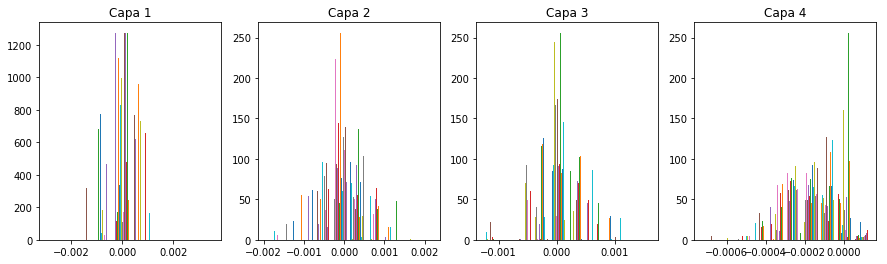

In [65]:
#Histograma despues del entrenamiento
plt.figure(figsize=(15,4))
plt.subplot(141)
plt.hist(evaluated_gradients[0])
plt.title("Capa 1")
plt.subplot(142)
plt.hist(evaluated_gradients[2])
plt.title("Capa 2")
plt.subplot(143)
plt.hist(evaluated_gradients[4])
plt.title("Capa 3")
plt.subplot(144)
plt.hist(evaluated_gradients[6])
plt.title("Capa 4")

In [53]:
#D)
modelD = Sequential()
modelD.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
modelD.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modelD.add(Dense(256,  kernel_initializer='glorot_uniform',activation='sigmoid'))
modelD.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modelD.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modelD.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelD.compile(optimizer=sgd,loss='mean_squared_error')

In [54]:
loss = keras.losses.mean_squared_error(modelD.output,y_train_scaled)
listOfVariableTensors = modelD.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={modelD.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

Text(0.5,1,'Capa 4')

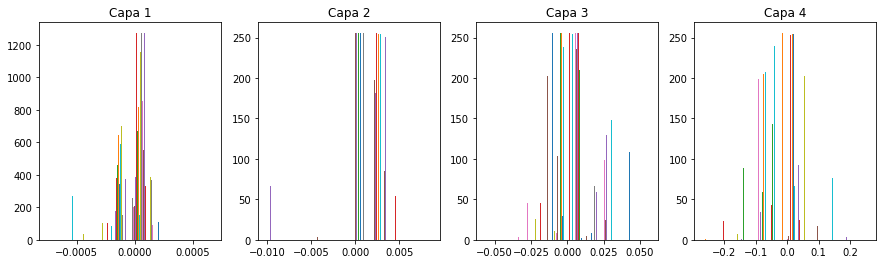

In [55]:
#Histograma
plt.figure(figsize=(15,4))
plt.subplot(141)
plt.hist(evaluated_gradients[0])
plt.title("Capa 1")
plt.subplot(142)
plt.hist(evaluated_gradients[2])
plt.title("Capa 2")
plt.subplot(143)
plt.hist(evaluated_gradients[4])
plt.title("Capa 3")
plt.subplot(144)
plt.hist(evaluated_gradients[6])
plt.title("Capa 4")

In [56]:
history = modelD.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 349us/step - loss: 14.6424 - val_loss: 15.7349
Epoch 2/250
9745/9745 [==============================] - 3s 341us/step - loss: 5.1592 - val_loss: 2.7362
Epoch 3/250
9745/9745 [==============================] - 3s 346us/step - loss: 1.8445 - val_loss: 1.1849
Epoch 4/250
9745/9745 [==============================] - 3s 323us/step - loss: 1.0882 - val_loss: 0.7623
Epoch 5/250
9745/9745 [==============================] - 3s 313us/step - loss: 0.9675 - val_loss: 0.4590
Epoch 6/250
9745/9745 [==============================] - 3s 320us/step - loss: 0.7771 - val_loss: 1.2609
Epoch 7/250
9745/9745 [==============================] - 3s 356us/step - loss: 0.6399 - val_loss: 0.4548
Epoch 8/250
9745/9745 [==============================] - 3s 345us/step - loss: 0.5749 - val_loss: 0.6625
Epoch 9/250
9745/9745 [==============================] - 3s 324us/step - loss: 0.5232 - val_loss: 0.5627
Epoch

Epoch 78/250
9745/9745 [==============================] - 3s 316us/step - loss: 0.0512 - val_loss: 0.1139
Epoch 79/250
9745/9745 [==============================] - 3s 311us/step - loss: 0.0489 - val_loss: 0.1060
Epoch 80/250
9745/9745 [==============================] - 3s 311us/step - loss: 0.0564 - val_loss: 0.0510
Epoch 81/250
9745/9745 [==============================] - 3s 344us/step - loss: 0.0601 - val_loss: 0.0483
Epoch 82/250
9745/9745 [==============================] - 3s 342us/step - loss: 0.0526 - val_loss: 0.0566
Epoch 83/250
9745/9745 [==============================] - 3s 312us/step - loss: 0.0546 - val_loss: 0.0479
Epoch 84/250
9745/9745 [==============================] - 3s 313us/step - loss: 0.0496 - val_loss: 0.0761
Epoch 85/250
9745/9745 [==============================] - 3s 316us/step - loss: 0.0512 - val_loss: 0.0504
Epoch 86/250
9745/9745 [==============================] - 3s 346us/step - loss: 0.0483 - val_loss: 0.0570
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 3s 340us/step - loss: 0.0336 - val_loss: 0.0375
Epoch 156/250
9745/9745 [==============================] - 3s 342us/step - loss: 0.0291 - val_loss: 0.0388
Epoch 157/250
9745/9745 [==============================] - 3s 315us/step - loss: 0.0321 - val_loss: 0.0390
Epoch 158/250
9745/9745 [==============================] - 3s 312us/step - loss: 0.0280 - val_loss: 0.0348
Epoch 159/250
9745/9745 [==============================] - 3s 314us/step - loss: 0.0313 - val_loss: 0.0360
Epoch 160/250
9745/9745 [==============================] - 3s 343us/step - loss: 0.0308 - val_loss: 0.0608
Epoch 161/250
9745/9745 [==============================] - 3s 343us/step - loss: 0.0322 - val_loss: 0.0686
Epoch 162/250
9745/9745 [==============================] - 3s 320us/step - loss: 0.0328 - val_loss: 0.0354
Epoch 163/250
9745/9745 [==============================] - 3s 320us/step - loss: 0.0274 - val_loss: 0.0684
Epoch 164/250
9745/9745 [============

In [57]:
#obtener gradientes luego de entrenar la red
loss = keras.losses.mean_squared_error(modelD.output,y_train_scaled)
listOfVariableTensors = modelD.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={modelD.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

Text(0.5,1,'Capa 4')

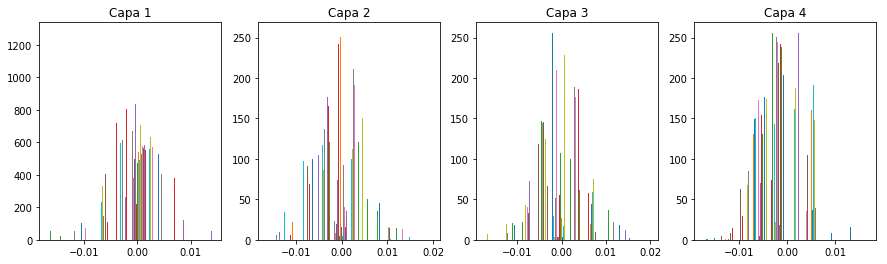

In [58]:
#Histograma despues de entrenar
plt.figure(figsize=(15,4))
plt.subplot(141)
plt.hist(evaluated_gradients[0])
plt.title("Capa 1")
plt.subplot(142)
plt.hist(evaluated_gradients[2])
plt.title("Capa 2")
plt.subplot(143)
plt.hist(evaluated_gradients[4])
plt.title("Capa 3")
plt.subplot(144)
plt.hist(evaluated_gradients[6])
plt.title("Capa 4")

In [25]:
#E)
modelE = Sequential()
modelE.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
modelE.add(Dense(256, kernel_initializer='uniform',activation='relu'))
modelE.add(Dense(256,  kernel_initializer='uniform',activation='relu'))
modelE.add(Dense(256, kernel_initializer='uniform',activation='relu'))
modelE.add(Dense(256, kernel_initializer='uniform',activation='relu'))
modelE.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelE.compile(optimizer=sgd,loss='mean_squared_error')

In [26]:
#obtener gradientes luego de entrenar la red
loss = keras.losses.mean_squared_error(modelE.output,y_train_scaled)
listOfVariableTensors = modelE.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={modelE.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

(array([  2.,   3.,   2.,  12.,  24., 116.,  62.,  16.,  14.,   5.]),
 array([-0.4824062 , -0.39956605, -0.3167259 , -0.23388575, -0.15104559,
        -0.06820545,  0.0146347 ,  0.09747486,  0.180315  ,  0.26315516,
         0.3459953 ], dtype=float32),
 <a list of 10 Patch objects>)

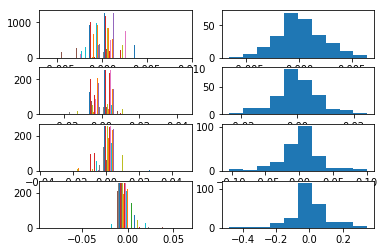

In [27]:
#Histograma
plt.figure(figsize=(15,4))
plt.subplot(141)
plt.hist(evaluated_gradients[0])
plt.title("Capa 1")
plt.subplot(142)
plt.hist(evaluated_gradients[2])
plt.title("Capa 2")
plt.subplot(143)
plt.hist(evaluated_gradients[4])
plt.title("Capa 3")
plt.subplot(144)
plt.hist(evaluated_gradients[6])
plt.title("Capa 4")

In [28]:
history = modelE.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 402us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 4s 368us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 3s 322us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 323us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 326us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 4s 366us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 4s 363us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 3s 324us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 3s 324us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 3s 357us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 346us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 3s 321us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 3s 323us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 3s 334us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 3s 358us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 3s 345us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 3s 322us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 3s 324us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 3s 340us/step - loss: nan - val_loss: nan
Epoc

In [ ]:
#obtener gradientes luego de entrenar la red
loss = keras.losses.mean_squared_error(modelE.output,y_train_scaled)
listOfVariableTensors = modelE.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={modelE.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

In [ ]:
#Histograma despues de entrenar
plt.figure(figsize=(15,4))
plt.subplot(141)
plt.hist(evaluated_gradients[0])
plt.title("Capa 1")
plt.subplot(142)
plt.hist(evaluated_gradients[2])
plt.title("Capa 2")
plt.subplot(143)
plt.hist(evaluated_gradients[4])
plt.title("Capa 3")
plt.subplot(144)
plt.hist(evaluated_gradients[6])
plt.title("Capa 4")

In [ ]:
#e2)
modelE = Sequential()
modelE.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
modelE.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
modelE.add(Dense(256,  kernel_initializer='he_uniform',activation='relu'))
modelE.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
modelE.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
modelE.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelE.compile(optimizer=sgd,loss='mean_squared_error')

In [ ]:
#obtener gradientes luego de entrenar la red
loss = keras.losses.mean_squared_error(modelE.output,y_train_scaled)
listOfVariableTensors = modelE.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={modelE.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

In [ ]:
#Histograma
plt.figure(figsize=(15,4))
plt.subplot(141)
plt.hist(evaluated_gradients[0])
plt.title("Capa 1")
plt.subplot(142)
plt.hist(evaluated_gradients[2])
plt.title("Capa 2")
plt.subplot(143)
plt.hist(evaluated_gradients[4])
plt.title("Capa 3")
plt.subplot(144)
plt.hist(evaluated_gradients[6])
plt.title("Capa 4")

In [ ]:
history = modelE.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled))

In [ ]:
#obtener gradientes luego de entrenar la red
loss = keras.losses.mean_squared_error(modelE.output,y_train_scaled)
listOfVariableTensors = modelE.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={modelE.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]

In [ ]:
#Histograma despues de entrenar
plt.figure(figsize=(15,4))
plt.subplot(141)
plt.hist(evaluated_gradients[0])
plt.title("Capa 1")
plt.subplot(142)
plt.hist(evaluated_gradients[2])
plt.title("Capa 2")
plt.subplot(143)
plt.hist(evaluated_gradients[4])
plt.title("Capa 3")
plt.subplot(144)
plt.hist(evaluated_gradients[6])
plt.title("Capa 4")

In [ ]:
#f)
modelf = Sequential()
modelf.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(256,  kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelf.compile(optimizer=sgd,loss='mean_squared_error')
history = modelf.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled))
score = modelf.evaluate(X_test_scaled, y_test_scaled)
print("\n Loss: %.3f \t:" %(score))

In [67]:
modelf = Sequential()
modelf.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(256,  kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.1)
modelf.compile(optimizer=sgd,loss='mean_squared_error')
history = modelf.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled))
score = modelf.evaluate(X_test_scaled, y_test_scaled)
print("\n Loss: %.3f \t:" %(score))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 22s 2ms/step - loss: 83.0819 - val_loss: 14.2432
Epoch 2/250
9745/9745 [==============================] - 4s 387us/step - loss: 13.6692 - val_loss: 14.5544
Epoch 3/250
9745/9745 [==============================] - 4s 360us/step - loss: 13.6845 - val_loss: 14.6963
Epoch 4/250
9745/9745 [==============================] - 3s 332us/step - loss: 13.6880 - val_loss: 14.1150
Epoch 5/250
9745/9745 [==============================] - 3s 333us/step - loss: 13.6888 - val_loss: 14.2681
Epoch 6/250
9745/9745 [==============================] - 4s 361us/step - loss: 13.6743 - val_loss: 14.9463
Epoch 7/250
9745/9745 [==============================] - 4s 373us/step - loss: 13.6794 - val_loss: 13.8457
Epoch 8/250
9745/9745 [==============================] - 3s 346us/step - loss: 13.6977 - val_loss: 13.9682
Epoch 9/250
9745/9745 [==============================] - 4s 360us/step - loss: 13.6940 - val_loss

9745/9745 [==============================] - 3s 339us/step - loss: 13.6973 - val_loss: 14.4571
Epoch 152/250
9745/9745 [==============================] - 3s 305us/step - loss: 13.6738 - val_loss: 14.5350
Epoch 153/250
9745/9745 [==============================] - 3s 316us/step - loss: 13.6784 - val_loss: 15.2482
Epoch 154/250
9745/9745 [==============================] - 3s 338us/step - loss: 13.6792 - val_loss: 15.0080
Epoch 155/250
9745/9745 [==============================] - 4s 391us/step - loss: 13.6801 - val_loss: 14.5321
Epoch 156/250
9745/9745 [==============================] - 3s 337us/step - loss: 13.6672 - val_loss: 14.0953
Epoch 157/250
9745/9745 [==============================] - 3s 328us/step - loss: 13.6961 - val_loss: 14.1211
Epoch 158/250
9745/9745 [==============================] - 3s 336us/step - loss: 13.6846 - val_loss: 15.0003
Epoch 159/250
9745/9745 [==============================] - 3s 348us/step - loss: 13.6833 - val_loss: 14.3621
Epoch 160/250
9745/9745 [========

In [68]:
modelf = Sequential()
modelf.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='relu'))
modelf.add(Dense(256,  kernel_initializer='uniform',activation='relu'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='relu'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='relu'))
modelf.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelf.compile(optimizer=sgd,loss='mean_squared_error')
history = modelf.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled))
score = modelf.evaluate(X_test_scaled, y_test_scaled)
print("\n Loss: %.3f \t:" %(score))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 10s 986us/step - loss: 15.7905 - val_loss: 4.0707
Epoch 2/250
9745/9745 [==============================] - 3s 335us/step - loss: 0.9185 - val_loss: 0.4601
Epoch 3/250
9745/9745 [==============================] - 3s 333us/step - loss: 0.3924 - val_loss: 0.4907
Epoch 4/250
9745/9745 [==============================] - 3s 341us/step - loss: 0.2688 - val_loss: 0.2137
Epoch 5/250
9745/9745 [==============================] - 4s 370us/step - loss: 0.2339 - val_loss: 0.1811
Epoch 6/250
9745/9745 [==============================] - 4s 360us/step - loss: 0.2000 - val_loss: 0.1474
Epoch 7/250
9745/9745 [==============================] - 3s 317us/step - loss: 0.1529 - val_loss: 0.1211
Epoch 8/250
9745/9745 [==============================] - 3s 313us/step - loss: 0.1422 - val_loss: 0.1489
Epoch 9/250
9745/9745 [==============================] - 3s 324us/step - loss: 0.1330 - val_loss: 0.1488
Epoch

Epoch 78/250
9745/9745 [==============================] - 3s 296us/step - loss: 0.0234 - val_loss: 0.0339
Epoch 79/250
9745/9745 [==============================] - 3s 323us/step - loss: 0.0229 - val_loss: 0.0499
Epoch 80/250
9745/9745 [==============================] - 3s 332us/step - loss: 0.0264 - val_loss: 0.0417
Epoch 81/250
9745/9745 [==============================] - 3s 297us/step - loss: 0.0237 - val_loss: 0.0307
Epoch 82/250
9745/9745 [==============================] - 3s 301us/step - loss: 0.0231 - val_loss: 0.0376
Epoch 83/250
9745/9745 [==============================] - 3s 296us/step - loss: 0.0230 - val_loss: 0.0353
Epoch 84/250
9745/9745 [==============================] - 3s 314us/step - loss: 0.0243 - val_loss: 0.0424
Epoch 85/250
9745/9745 [==============================] - 3s 321us/step - loss: 0.0211 - val_loss: 0.0325
Epoch 86/250
9745/9745 [==============================] - 3s 301us/step - loss: 0.0217 - val_loss: 0.0477
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 3s 302us/step - loss: 0.0151 - val_loss: 0.0273
Epoch 156/250
9745/9745 [==============================] - 3s 305us/step - loss: 0.0165 - val_loss: 0.0323
Epoch 157/250
9745/9745 [==============================] - 3s 339us/step - loss: 0.0149 - val_loss: 0.0437
Epoch 158/250
9745/9745 [==============================] - 4s 362us/step - loss: 0.0162 - val_loss: 0.0346
Epoch 159/250
9745/9745 [==============================] - 4s 371us/step - loss: 0.0153 - val_loss: 0.0296
Epoch 160/250
9745/9745 [==============================] - 3s 352us/step - loss: 0.0158 - val_loss: 0.0277
Epoch 161/250
9745/9745 [==============================] - 3s 343us/step - loss: 0.0142 - val_loss: 0.0263
Epoch 162/250
9745/9745 [==============================] - 4s 381us/step - loss: 0.0145 - val_loss: 0.0445
Epoch 163/250
9745/9745 [==============================] - 3s 356us/step - loss: 0.0140 - val_loss: 0.0280
Epoch 164/250
9745/9745 [============

In [66]:
modelf = Sequential()
modelf.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(256,  kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelf.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01, momentum=0.8)
modelf.compile(optimizer=sgd,loss='mean_squared_error')
history = modelf.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled))
score = modelf.evaluate(X_test_scaled, y_test_scaled)
print("\n Loss: %.3f \t:" %(score))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 7s 723us/step - loss: 6.5295 - val_loss: 0.6051
Epoch 2/250
9745/9745 [==============================] - 6s 582us/step - loss: 0.5867 - val_loss: 0.3654
Epoch 3/250
9745/9745 [==============================] - 6s 579us/step - loss: 0.3431 - val_loss: 0.3782
Epoch 4/250
9745/9745 [==============================] - 6s 582us/step - loss: 0.2204 - val_loss: 0.1590
Epoch 5/250
9745/9745 [==============================] - 6s 584us/step - loss: 0.1557 - val_loss: 0.1545
Epoch 6/250
9745/9745 [==============================] - 5s 559us/step - loss: 0.1180 - val_loss: 0.1228
Epoch 7/250
9745/9745 [==============================] - 5s 539us/step - loss: 0.1017 - val_loss: 0.1583
Epoch 8/250
9745/9745 [==============================] - 6s 586us/step - loss: 0.0953 - val_loss: 0.0835
Epoch 9/250
9745/9745 [==============================] - 6s 579us/step - loss: 0.0787 - val_loss: 0.0890
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 5s 516us/step - loss: 0.0190 - val_loss: 0.0414
Epoch 79/250
9745/9745 [==============================] - 5s 543us/step - loss: 0.0193 - val_loss: 0.0326
Epoch 80/250
9745/9745 [==============================] - 5s 543us/step - loss: 0.0198 - val_loss: 0.0338
Epoch 81/250
9745/9745 [==============================] - 5s 514us/step - loss: 0.0214 - val_loss: 0.0311
Epoch 82/250
9745/9745 [==============================] - 5s 553us/step - loss: 0.0190 - val_loss: 0.0320
Epoch 83/250
9745/9745 [==============================] - 5s 544us/step - loss: 0.0196 - val_loss: 0.0349
Epoch 84/250
9745/9745 [==============================] - 5s 519us/step - loss: 0.0193 - val_loss: 0.0299
Epoch 85/250
9745/9745 [==============================] - 5s 553us/step - loss: 0.0190 - val_loss: 0.0320
Epoch 86/250
9745/9745 [==============================] - 5s 544us/step - loss: 0.0200 - val_loss: 0.0365
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 3s 303us/step - loss: 0.0126 - val_loss: 0.0269
Epoch 156/250
9745/9745 [==============================] - 3s 322us/step - loss: 0.0122 - val_loss: 0.0271
Epoch 157/250
9745/9745 [==============================] - 3s 305us/step - loss: 0.0126 - val_loss: 0.0285
Epoch 158/250
9745/9745 [==============================] - 3s 296us/step - loss: 0.0125 - val_loss: 0.0258
Epoch 159/250
9745/9745 [==============================] - 3s 305us/step - loss: 0.0121 - val_loss: 0.0248
Epoch 160/250
9745/9745 [==============================] - 3s 297us/step - loss: 0.0125 - val_loss: 0.0246
Epoch 161/250
9745/9745 [==============================] - 3s 321us/step - loss: 0.0118 - val_loss: 0.0288
Epoch 162/250
9745/9745 [==============================] - 3s 314us/step - loss: 0.0119 - val_loss: 0.0251
Epoch 163/250
9745/9745 [==============================] - 3s 293us/step - loss: 0.0121 - val_loss: 0.0282
Epoch 164/250
9745/9745 [============

In [ ]:
#g)
modelf = Sequential()
modelf.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='softplus'))
modelf.add(Dense(256, kernel_initializer='he_uniform',activation='softplus'))
modelf.add(Dense(256,  kernel_initializer='he_uniform',activation='softplus'))
modelf.add(Dense(256, kernel_initializer='he_uniform',activation='softplus'))
modelf.add(Dense(256, kernel_initializer='he_uniform',activation='softplus'))
modelf.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelf.compile(optimizer=sgd,loss='mean_squared_error')
history = modelf.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled))
score = modelf.evaluate(X_test_scaled, y_test_scaled)
print("\n Loss: %.3f \t:" %(score))

In [ ]:
modelf = Sequential()
modelf.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='softplus'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='softplus'))
modelf.add(Dense(256,  kernel_initializer='uniform',activation='softplus'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='softplus'))
modelf.add(Dense(256, kernel_initializer='uniform',activation='softplus'))
modelf.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelf.compile(optimizer=sgd,loss='mean_squared_error')
history = modelf.fit(X_train_scaled, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val_scaled))
score = modelf.evaluate(X_test_scaled, y_test_scaled)
print("\n Loss: %.3f \t:" %(score))

In [ ]:
#h)
model = Sequential()
model.add(Dense(1024, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.values, y_train_scaled, epochs=250, verbose=1, validation_data=(X_val_scaled.values, y_val_scaled))